# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [1]:
def f(x: float) -> float:
  return x**2

In [2]:
def dfdx(x: float) -> float:
  return 2 * x

In [3]:
f(2), dfdx(2)

(4, 4)

In [4]:
from typing import Callable


def dfdx_finite(f: Callable, x: float, h: float) -> float:
  return (f(x+h) - f(x)) / h

In [5]:
dfdx_finite(f, 2, 1e-5)

4.000010000027032

In [6]:
import torch as th

In [7]:
x = th.tensor(10.0, requires_grad=True)
x

tensor(10., requires_grad=True)

In [8]:
def g(x: th.Tensor) -> th.Tensor:
  return x ** 2

In [9]:
y = g(x)
y

tensor(100., grad_fn=<PowBackward0>)

In [10]:
y.backward()

In [11]:
x.grad # dy/dx

tensor(20.)

In [12]:
type(x)

torch.Tensor

In [13]:
th.tensor

<function torch._VariableFunctionsClass.tensor>

In [14]:
x = th.tensor(10.0, requires_grad=True)
y = f(x)
y.backward()
grad = x.grad

gamma = 0.01
x = x - gamma * grad
# x -= gamma * grad  # will throw error

In [15]:
x = th.tensor([10.0, 20.0, 30.0], requires_grad=True)
y = g(x)
# y = [x1**2, x2**2, x3**2]
try:
    y.backward()
except Exception as e:
    print(e)

grad can be implicitly created only for scalar outputs


In [16]:
x1, x2, x3 = x
J = th.tensor(
    [[2*x1, 0, 0],
    [0, 2*x2, 0],
    [0, 0, 2*x3],]
)
J

tensor([[20.,  0.,  0.],
        [ 0., 40.,  0.],
        [ 0.,  0., 60.]])

In [17]:
z = th.ones((3, 1))
J @ z

tensor([[20.],
        [40.],
        [60.]])

In [18]:
x = th.tensor([10.0, 20.0, 30.0], requires_grad=True)
y = g(x)
# y = [x1**2, x2**2, x3**2]
y.backward(th.ones((3, )))
x.grad

tensor([20., 40., 60.])

## Задачи для самостоятельного решения

In [19]:
import torch as th
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

<p class="task" id="1"></p>

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [1, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [20]:
f = lambda x: np.sin(x) / (np.log(x) + 1)
dfdx = lambda x: (np.cos(x)*(np.log(x) + 1) - np.sin(x)/x) / (np.log(x) + 1)**2
g = lambda _: 0

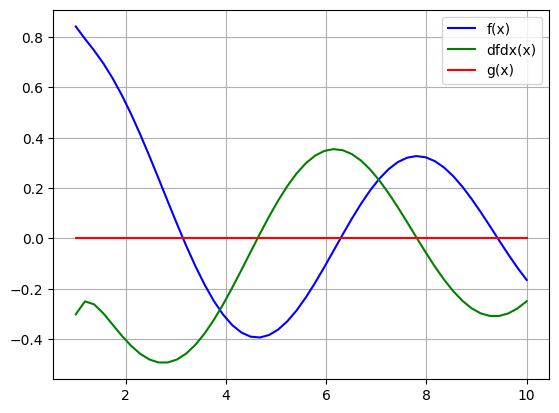

In [21]:
lsp = np.linspace(1, 10)
plt.plot(lsp, [f(i) for i in lsp], color='b', label='f(x)')
plt.plot(lsp, [dfdx(i) for i in lsp], color='g', label='dfdx(x)')
plt.plot(lsp, [g(i) for i in lsp], color='r', label='g(x)')

plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="2"></p>

2\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [1, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [22]:
f = lambda x: np.sin(x) / (np.log(x) + 1)
g = lambda _: 0

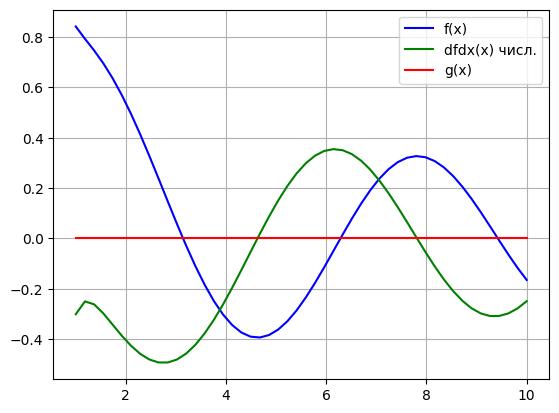

In [23]:
h = 0.001
lsp = np.linspace(1, 10)
plt.plot(lsp, [f(i) for i in lsp], color='b', label='f(x)')
plt.plot(lsp, [(f(x+h) - f(x)) / h for x in lsp], color='g', label='dfdx(x) числ.')
plt.plot(lsp, [g(i) for i in lsp], color='r', label='g(x)')

plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="3"></p>

3\. Найдите локальный минимум функции $f(x)$ при помощи метода градиентного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [24]:
f = lambda x: np.sin(x) / (np.log(x) + 1)
dfdx = lambda x: (np.cos(x)*(np.log(x) + 1) - np.sin(x)/x) / (np.log(x) + 1)**2

In [25]:
def gradient(f, x0, lr=0.01, h=1e-6, tol=1e-6, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        grad = (f(x + h) - f(x)) / h
        x_new = x - lr*grad
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x

In [26]:
x_min = gradient(f, 4, 0.01, max_iter=5000)
f'Локальный минимум в точке {x_min}'

'Локальный минимум в точке 4.626982648943009'

In [27]:
x_max = gradient(lambda x: -f(x), 9, 0.01, max_iter=5000)
f'Локальный максимум в точке {x_max}'

'Локальный максимум в точке 7.812420989109678'

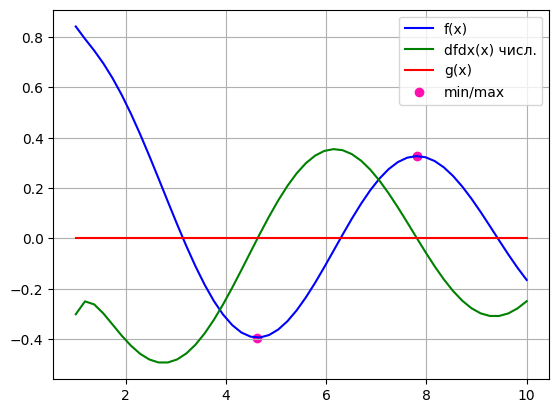

In [28]:
h = 0.001
lsp = np.linspace(1, 10)
plt.plot(lsp, [f(i) for i in lsp], color='b', label='f(x)')
plt.plot(lsp, [(f(x+h) - f(x)) / h for x in lsp], color='g', label='dfdx(x) числ.')
plt.plot(lsp, [g(i) for i in lsp], color='r', label='g(x)')
plt.scatter([x_min, x_max], [f(x_min), f(x_max)], color='#FF0FAF', label='min/max')

plt.grid(True)
plt.legend()
plt.show()

In [29]:
f = lambda x: th.sin(x) / (th.log(x) + 1)

In [30]:
def gradient(f, x, lr=0.01, epochs=1000):
    x = th.tensor(x, dtype=th.float32, requires_grad=True)
    optimizer = th.optim.SGD([x], lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        y = f(x)
        y.backward()
        optimizer.step()
    return x.detach().item()

In [31]:
x_min = gradient(f, 4, 0.01)
print(f'Локальный минимум в точке {x_min}')

Локальный минимум в точке 4.614431381225586


In [32]:
x_max = gradient(lambda x: -f(x), 9, 0.01)
f'Локальный максимум в точке {x_max}'

'Локальный максимум в точке 7.866622447967529'

<p class="task" id="4"></p>

4\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на полуинтервале (0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

- [ ] Проверено на семинаре

In [33]:
f = lambda x: th.sin(x) / (th.log(x) + 1)
x = th.linspace(0.5, 10, 5000, requires_grad=True)
y = f(x)
x, y

(tensor([ 0.5000,  0.5019,  0.5038,  ...,  9.9962,  9.9981, 10.0000],
        requires_grad=True),
 tensor([ 1.5624,  1.5487,  1.5354,  ..., -0.1638, -0.1643, -0.1647],
        grad_fn=<DivBackward0>))

In [34]:
y.backward(th.ones((x.shape[0], )))

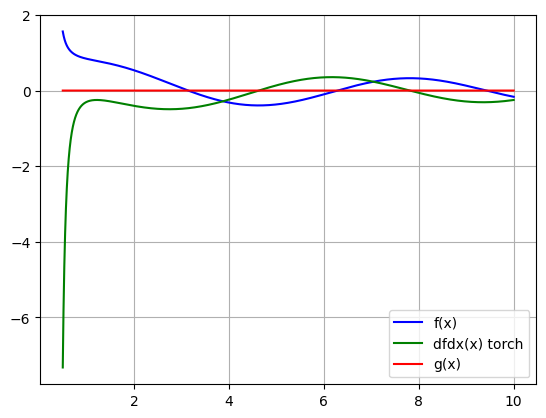

In [35]:
plt.plot(x.detach().numpy(), y.detach().numpy(), color='b', label='f(x)')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), color='g', label='dfdx(x) torch')
plt.plot(x.detach().numpy(), [0]*len(x), color='r', label='g(x)')

plt.grid(True)
plt.legend()
plt.show()

<p class="task" id="5"></p>

5\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

- [ ] Проверено на семинаре

In [36]:
def g(x: th.Tensor) -> th.Tensor:
    return th.sin(x)

def h(x: th.Tensor) -> th.Tensor:
    return th.cos(x)

def dfdg(x: th.Tensor) -> th.Tensor:
    return th.cos(x)

def dgdx(x: th.Tensor) -> th.Tensor:
    return -th.sin(x)

def dfdx(x: th.Tensor) -> th.Tensor:
    return dfdg(h(x)) * dgdx(x)

In [37]:
x = 0.5
out = -np.cos(np.cos(x)) * np.sin(x)
f'{out = :.4f}'

'out = -0.3064'

In [38]:
x = th.tensor(x, requires_grad=True)
out = dfdx(x)
f'{out = :.4f}'

'out = -0.3064'

In [39]:
def f(x: th.Tensor) -> th.Tensor:
    return th.sin(th.cos(x))

In [40]:
x = th.linspace(0.5, 10, 5000, requires_grad=True)
y = f(x)
y.backward(th.ones_like(x))
x.grad

tensor([-0.3064, -0.3078, -0.3092,  ...,  0.3605,  0.3620,  0.3635])

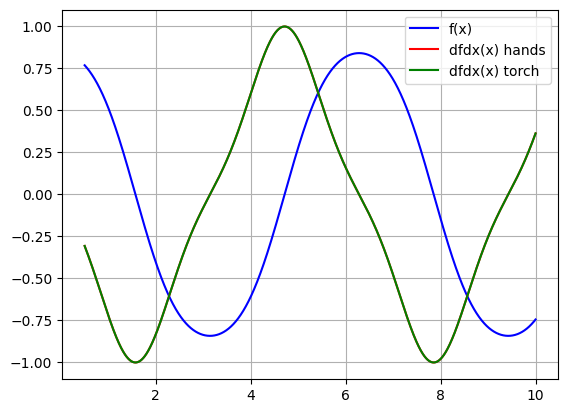

In [41]:
plt.plot(x.detach().numpy(), y.detach().numpy(), color='b', label='f(x)')
plt.plot(x.detach().numpy(), dfdx(x).detach().numpy(), color='r', label='dfdx(x) hands')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), color='g', label='dfdx(x) torch')

plt.grid(True)
plt.legend()
plt.show()

In [42]:
out_hands = dfdx(x).detach().numpy()
out_torch = x.grad.detach().numpy()
(out_hands - out_torch).sum()

0.0